In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras_self_attention import SeqSelfAttention
from sklearn.metrics import mean_squared_error

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,multilabel_confusion_matrix, confusion_matrix

import seaborn as sns
#from scipy import stats


In [90]:
def data_prerocessing (Input,Output):
    #Input = (Input - np.mean(Input,axis = 0))/np.std(Input,axis = 0)
    Input = Input/np.std(Input,axis = 0)
    (qt,Removal,finalPH,LeachingMg) = (Output[:,0],Output[:,1],Output[:,2],Output[:,3])
    
    fixpoint = dict(qt =  2.03, 
                    Removal = np.max(Removal)- np.min(Removal),
                    finalPH = np.max(finalPH)- np.min(finalPH),
                    LeachingMg = 1.706)
    
    qt_processed = np.emath.logn(fixpoint['qt'],qt)
    Removal_processed = Removal/fixpoint['Removal']
    finalPH_processed = finalPH/fixpoint['finalPH']
    LeachingMg_processed = np.emath.logn(fixpoint['LeachingMg'],LeachingMg+1)    
    Output = np.stack((qt_processed,Removal_processed,finalPH_processed,LeachingMg_processed),axis = 1)
    
    return (Input,Output,fixpoint)

def cal_result(prediction,fix_point):
    
    qt_result = np.power(fix_point['qt'],prediction[:,0])
    Removal_result = prediction[:,1] * fix_point['Removal']
    finalPH_result = prediction[:,2] * fix_point['finalPH']
    LeachingMg_result = np.power(fix_point['LeachingMg'],prediction[:,3])-1
    result = np.stack((qt_result,Removal_result,finalPH_result,LeachingMg_result),axis = 1)
    
    return result


In [91]:
#Loading data
#df= pd.read_csv('F-removal-by-MgO-data-321data-points.csv')
df= pd.read_csv('Data-for-P-MgO.csv')
data = pd.DataFrame.to_numpy(df)   
print(data.shape)

(318, 19)


In [200]:
#Data preprocessing
#input of model
X = data[:,0:15]
#output of model
Y = data[:,15:19]
X_,Y_ ,fix_point= data_prerocessing(X,Y)
print(fix_point)

{'qt': 2.03, 'Removal': 97.82, 'finalPH': 5.750000000000001, 'LeachingMg': 1.706}


In [201]:
#Split arrays or matrices into random train and test subset 
#training 70%, testing 30%

X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.3, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [94]:
tmp = np.concatenate((X_train,y_train),axis = 1)
Train_data = pd.DataFrame(data = tmp, columns= df.columns.values)
Train_data.to_csv("Training set-Data-for-P-MgO.csv",index = None)

tmp = np.concatenate((X_test,y_test),axis = 1)
Test_data = pd.DataFrame(data = tmp, columns= df.columns.values)
Train_data.to_csv("Testing set-Data-for-P-MgO.csv",index = None)

# Neural Network and Deep NN models for muliti regression

# Type1: 1 Layer NN (Shallow NN)

In [98]:
def Shallow_NN(HiddenLayerNote=20,output_dim=4):
    # Initialising the ANN
    model = Sequential()

    # Adding the input layer and the first hidden layer
    model.add(Dense(HiddenLayerNote, activation='relu'))
    
    # Adding the output layer
    model.add(Dense(units = output_dim, activation='relu'))
              
    # define opimizaion method
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    #define loss function
    model.compile(optimizer=opt, loss=losses.MeanSquaredError())          
    return model

In [115]:
#ANN_model = Shallow_NN(HiddenLayerNote = 8)
#ANN_model = Shallow_NN(HiddenLayerNote = 16)
ANN_model = Shallow_NN(HiddenLayerNote = 128)
#ANN_model = Shallow_NN(HiddenLayerNote = 64)

# Type2: Deep NN (architecture #1)

In [204]:
# Creating Deep neural network
ANN_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
])

In [218]:
# Creating Deep neural network
ANN_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
])

# Type3: Deep NN (architecture #2)

In [243]:
# Creating Deep neural network
Input = tf.keras.Input(shape=(None,15))
X = tf.keras.layers.Dense(units=64, activation='relu')(Input)
X = tf.keras.layers.Dense(units=32, activation='relu')(X)
X = tf.keras.layers.Dense(units=8, activation='relu')(X)
X1 = tf.keras.layers.Dense(units=4, activation='relu')(X)
X1 = tf.keras.layers.Dense(units=1, activation='relu')(X1)

X2 = tf.keras.layers.Dense(units=4, activation='relu')(X)
X2 = tf.keras.layers.Dense(units=1, activation='relu')(X2)

X3 = tf.keras.layers.Dense(units=4, activation='relu')(X)
X3 = tf.keras.layers.Dense(units=1, activation='relu')(X3)

X4 = tf.keras.layers.Dense(units=4, activation='relu')(X)
X4 = tf.keras.layers.Dense(units=1, activation='relu')(X4)
Output = tf.keras.layers.Concatenate()([X1, X2,X3,X4])

ANN_model = tf.keras.Model(Input,Output)

# Training model and Evaluation Prediction

In [213]:
# define opimizaion method
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
#define loss function
ANN_model.compile(optimizer=opt, loss=losses.MeanSquaredError())
#training model
ANN_model.fit(X_train, y_train, validation_data = (X_test,y_test), batch_size=512, epochs=1, shuffle=True)

1/1 [==============================] - 0s 336ms/step - loss: 0.0620 - val_loss: 1.2316


In [249]:
#save model
#ANN_model.save('Model_for PMgO\DNN architecture_1 [64_32_8_4]')
#ANN_model.save('Model_for PMgO\Shallow_NN [128]')
#ANN_model = tf.keras.models.load_model('Model_for PMgO\Shallow_NN [128]')
#ANN_model.save('Model_for PMgO\DNN architecture_1 [64_32_16_8_4]')
#ANN_model.save('Model_for PMgO\DNN architecture_2 [32_16_8_4_1]')
ANN_model.save('Model_for PMgO\DNN architecture_2 [64_32_8_4_1]')

INFO:tensorflow:Assets written to: Model_for PMgO\DNN architecture_2 [64_32_8_4_1]\assets


In [248]:
predictions = ANN_model.predict(X_test)
predictions = cal_result(predictions,fix_point)
Y_t = cal_result(y_test,fix_point)
#Y_t = y_test
y_test_f = np.ndarray.flatten(Y_t)
predictions_f = np.ndarray.flatten(predictions)

# Metrics
mae = mean_absolute_error(y_test_f, predictions_f)

rmse = np.sqrt(mean_squared_error(y_test_f, predictions_f))

R_score = r2_score(y_test_f, predictions_f)

print([mae,rmse,R_score])


[4.207928270424406, 8.861264448578513, 0.978997006638718]


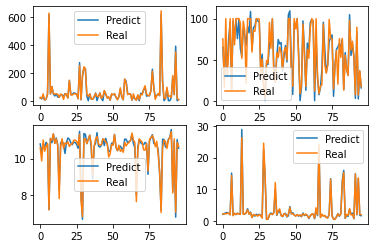

In [52]:
fig = plt.figure()
for index in range(4):
    plt.subplot(2,2,index+1)
    plt.plot(predictions[:,index],label = 'Predict')
    plt.plot(Y_t[:,index],label = 'Actual')
    plt.legend(['Predict', 'Real'])

In [62]:
predictions = ANN_model.predict(X_)
predictions = cal_result(predictions,fix_point)
data = pd.DataFrame(predictions)
data.to_csv('predictions.csv',index = False)

# Classical machine learning approaches

In [96]:
# Evaluate Classical ml models by training on training set and testing on testing set
import joblib
import sklearn
from catboost import CatBoostRegressor
def evaluate_classical_ML(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Multiple Linear Regression', 'ElasticNet Regression',
                     'Random Forest', 'Extra Trees', 'Lasso', 'Ridge',
                       'BaggingRegressor', 'KNeighborsRegressor']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=30)
    model4 = ExtraTreesRegressor(n_estimators=30)
    model5 = Lasso(alpha=0.5)
    model6 = Ridge(alpha=0.5)
    model7 = sklearn.ensemble.BaggingRegressor(n_estimators=50)
    model8 = sklearn.neighbors.KNeighborsRegressor()
    
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse', 'R-Squared'], index = model_name_list)
    plt.figure(figsize = (16, 16))
    plt.suptitle('Classical ML Predictions')
    
        
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4,model5,model6, model7, model8]):
        model.fit(X_train, y_train)
        
        joblib.dump(model,'saved_model_/'+ model_name_list[i]+'.pkl')
        
        predictions = model.predict(X_test)
        #calculate result 
        predictions = cal_result(predictions,fix_point)
        Y_t = cal_result(y_test,fix_point)
        #Y_t = y_test
        y_test_f = np.ndarray.flatten(Y_t)
        predictions_f = np.ndarray.flatten(predictions)
        print(Y_t.shape)
        print(predictions_f.shape)
        
        # Metrics
        mae = mean_absolute_error(y_test_f, predictions_f)

        rmse = np.sqrt(mean_squared_error(y_test_f, predictions_f))
        
        R_score = r2_score(y_test_f, predictions_f)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse, R_score]
        
        plt.subplot(4,3,i+1)
        plt.plot(y_test_f, color = 'red', label = 'Real data')
        plt.plot(predictions_f)
        plt.legend(['Actual', model_name_list[i]], fontsize = 10)
    
    plt.savefig('Classical ML Predictions.png', dpi=500, bbox_inches='tight')
    plt.show()
    
    return results

(96, 4)
(384,)
(96, 4)
(384,)
(96, 4)
(384,)
(96, 4)
(384,)
(96, 4)
(384,)
(96, 4)
(384,)
(96, 4)
(384,)
(96, 4)
(384,)


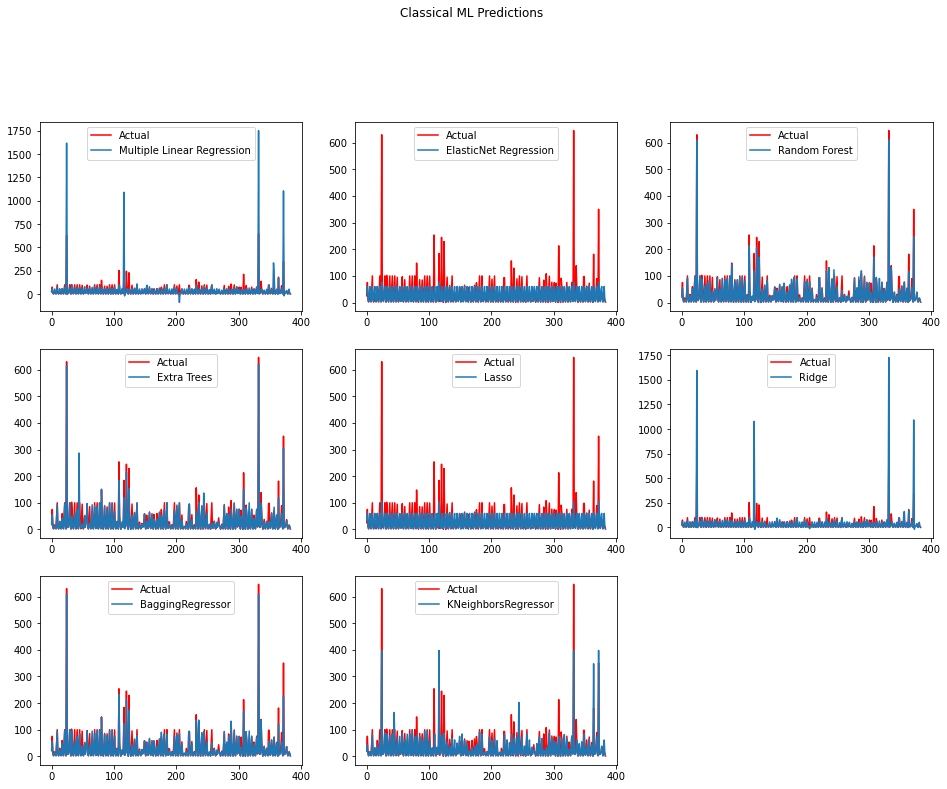

,mae,rmse,R-Squared
Multiple Linear Regression,24.120381,102.20977,-1.79431
ElasticNet Regression,19.078059,52.97032,0.249493
Random Forest,6.827151,15.672772,0.934298
Extra Trees,8.25695,21.703839,0.874002
Lasso,18.891035,50.84582,0.308487
Ridge,23.289474,98.947985,-1.618808
BaggingRegressor,6.528139,15.564663,0.935201
KNeighborsRegressor,14.150507,35.245191,0.667731


In [97]:
evaluate_classical_ML(X_train, X_test, y_train, y_test)

In [ ]:
import joblib
# Test set data 
# Load the trained model
model = joblib.load('saved_model_/Extra Trees.pkl')
#model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save model/DNN321684')

# Load the test data
#test_data = X_test
test_data = X_train


# Extract the true target values from the test data
#y_true = y_test_
y_true = y_train_

y_pred = model.predict(test_data)

# data processing
y_pred = cal_result(y_pred,fix_point)
output_data = {'qt': y_pred[:,0] , 'R': y_pred[:,1], 'finalpH' : y_pred[:,2], 'leachingMg': y_pred[:,3]}
output_data = pd.DataFrame(data=output_data)
output_path = 'predict_test.csv'
output_data.to_csv(output_path, index=False)

In [ ]:
y_pred.shape

In [ ]:
# Calculate the evaluation metrics
#y_pred_f = np.ndarray.flatten(y_pred)
#y_true_f = np.ndarray.flatten(y_true)

for index in range(4):
    y_pred_f = y_pred[:,index]
    y_true_f = y_true[:,index]
    mae = mean_absolute_error(y_pred_f, y_true_f)
    rmse = mean_squared_error(y_true_f, y_pred_f, squared=False)
    r2 = r2_score(y_pred_f, y_true_f)

    # Print the evaluation metrics
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")
    print("========================")


In [ ]:
y_pred_f = np.ndarray.flatten(y_pred)
y_true_f = np.ndarray.flatten(y_true)

mae = mean_absolute_error(y_pred_f, y_true_f)
rmse = mean_squared_error(y_true_f, y_pred_f, squared=False)
r2 = r2_score(y_pred_f, y_true_f)

# Print the evaluation metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

In [ ]:
#model = tf.keras.models.load_model('saved_model_/saved_model_DNN_16_16_4')
model = joblib.load('saved_model_/Extra Trees.pkl')
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()